In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from multi_molecule import Multi_Molecule

import ase
import os
from ase import io
from ase.visualize import view
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from ase.io.gaussian_reader import GaussianReader
from ase.io.gaussian import read_gaussian_out
from ase.calculators.gaussian import Gaussian
from ase import Atoms

import numpy as np
import matplotlib

In [2]:
results = [os.path.join("/gss_gpfs_scratch/harms.n/drug_conformer/",r) for r in os.listdir("/gss_gpfs_scratch/harms.n/drug_conformer/") if (not (r.startswith("aa") or r.startswith("gly") or r.startswith("ga") or r.startswith("opt"))) and r.endswith(".log") and (not "master" in r)]
master = [os.path.join("/gss_gpfs_scratch/harms.n/drug_conformer/",r) for r in os.listdir("/gss_gpfs_scratch/harms.n/drug_conformer/") if (not (r.startswith("aa") or r.startswith("gly") or r.startswith("opt"))) and r.endswith(".log") and ("master" in r)]
(not (results[0].startswith("aa") or results[0].startswith("gly"))) and results[0].endswith(".log") and (not "master" in results[0])
master

['/gss_gpfs_scratch/harms.n/drug_conformer/Phe_master.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/Trp_master.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/Ile_master.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/Gly_master.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/Ala_master.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/Val_master.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/Leu_master.log']

In [3]:
smiles_dict = {
    "Phe" : "NC(CC1=CC=CC=C1)C(=O)O",
    "Gly" : "NCCC(=O)O",
    "Ala" : "NC(C)C(=O)O",
    "Ile" : "NC(C(C)CC)C(=O)O",
    "Leu" : "NC(CC(C)C)C(=O)O",
    "Val" : "NC(C(C)C)C(=O)O",
    "Trp" : "NC(CC1=CNC2=C1(C=CC=C2))C(=O)O"
}

In [4]:


potential_results = []
for m in master:
    for r in results:
        if m.split('/')[-1].split("_")[0] == r.split('/')[-1].split("_")[0]:
            try:
                name = m.split('/')[-1].split("_")[0]
                if len(r.split("/")[-1].split("_")) == 2:
                    num = r.split("/")[-1].split("_")[-1].split(".")[0]
                else:
                    num = r.split("/")[-1].split("_")[1]
                print name
                #mol = Multi_Molecule(smiles)
                if r.split('/')[-1].split("_")[-1].startswith("es"):
                    t = "ga"
                else:
                    t = "es"
                

                am = read_gaussian_out(m, quantity="energy")
                ar = read_gaussian_out(r, quantity="energy")
                mass = read_gaussian_out(m).get_masses().sum()
                
                if ar == 0.:
                    print "We have a zero energy.... setting ar to nan"
                    potential_results.append([name, num, np.nan, am, mass, t, np.nan])
                else:
                
                    print "The difference between the master PE and our PE is {}".format(am - ar)

                    print

                    potential_results.append([name, num, ar , am , mass, t, np.abs(np.abs(am-ar)/am)])
            except IndexError:
                print "There was an error, this job probabaly failed"
                name = m.split('/')[-1].split("_")[0]
                mass = read_gaussian_out(m).get_masses().sum()
                if len(r.split("/")[-1].split("_")) == 2:
                    num = r.split("/")[-1].split("_")[-1].split(".")[0]
                else:
                    num = r.split("/")[-1].split("_")[1]
                if r.split('/')[-1].split("_")[-1].startswith("es"):
                    t = "ga"
                else:
                    t = "es"
                potential_results.append([name, num, np.nan, am, mass, t, np.nan])
                print
            
        
potential_results

Phe
The difference between the master PE and our PE is -0.273596880783

Phe
There was an error, this job probabaly failed

Phe
The difference between the master PE and our PE is -0.249101191086

Phe
The difference between the master PE and our PE is -0.289186283839

Phe
The difference between the master PE and our PE is -0.430299089481

Phe
The difference between the master PE and our PE is -0.387228907684

Phe
The difference between the master PE and our PE is -0.380409734345

Phe
There was an error, this job probabaly failed

Phe
There was an error, this job probabaly failed

Phe
The difference between the master PE and our PE is -0.175132480454

Phe
There was an error, this job probabaly failed

Phe
The difference between the master PE and our PE is -0.216872025478

Phe
There was an error, this job probabaly failed

Phe
The difference between the master PE and our PE is -0.161156712593

Phe
The difference between the master PE and our PE is -0.282625618667

Phe
There was an error, t

[['Phe',
  '248',
  -15095.601778183658,
  -15095.875375064441,
  165.19200000000004,
  'es',
  1.8123949356046757e-05],
 ['Phe', '129', nan, -15095.875375064441, 165.19200000000004, 'ga', nan],
 ['Phe',
  '157',
  -15095.626273873355,
  -15095.875375064441,
  165.19200000000004,
  'es',
  1.6501275010361567e-05],
 ['Phe',
  '199',
  -15095.586188780602,
  -15095.875375064441,
  165.19200000000004,
  'es',
  1.9156642238607674e-05],
 ['Phe',
  '122',
  -15095.44507597496,
  -15095.875375064441,
  165.19200000000004,
  'es',
  2.8504414536434838e-05],
 ['Phe',
  '101',
  -15095.488146156757,
  -15095.875375064441,
  165.19200000000004,
  'es',
  2.5651305277998802e-05],
 ['Phe',
  '346',
  -15095.494965330096,
  -15095.875375064441,
  165.19200000000004,
  'es',
  2.5199581004346014e-05],
 ['Phe', '108', nan, -15095.875375064441, 165.19200000000004, 'ga', nan],
 ['Phe', '59', nan, -15095.875375064441, 165.19200000000004, 'ga', nan],
 ['Phe',
  '52',
  -15095.700242583987,
  -15095.87537

In [5]:
potential_results = pd.DataFrame(potential_results)
potential_results.columns = ["AA" ,"num", "e_r", "e_m", "MM", "type", "delta_e"]
potential_results.set_index("AA")

,num,e_r,e_m,MM,type,delta_e
AA,,,,,,
Phe,248,-15095.601778,-15095.875375,165.192,es,1.812395e-05
Phe,129,NaN,-15095.875375,165.192,ga,NaN
Phe,157,-15095.626274,-15095.875375,165.192,es,1.650128e-05
Phe,199,-15095.586189,-15095.875375,165.192,es,1.915664e-05
Phe,122,-15095.445076,-15095.875375,165.192,es,2.850441e-05
Phe,101,-15095.488146,-15095.875375,165.192,es,2.565131e-05
Phe,346,-15095.494965,-15095.875375,165.192,es,2.519958e-05
Phe,108,NaN,-15095.875375,165.192,ga,NaN
Phe,59,NaN,-15095.875375,165.192,ga,NaN


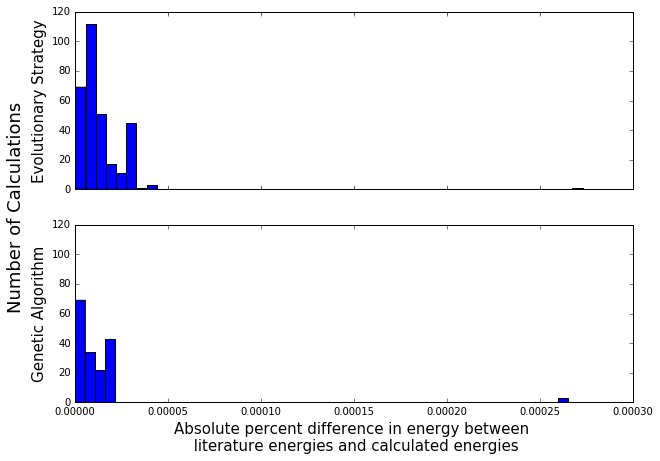

In [6]:

fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

potential_results[potential_results.type == "es"].plot(kind="Hist", x="AA", y="delta_e", ax=ax1, bins=50, sharex=True, legend=False)
potential_results[potential_results.type == "ga"].plot(kind="Hist", x="AA", y="delta_e", ax=ax2, bins=50, sharex=True, legend=False)

ax1.set_ylim([0, 120])
ax2.set_ylim([0, 120])

ax1.set_ylabel("Evolutionary Strategy", fontdict={"size":15})
ax2.set_ylabel("Genetic Algorithm", fontdict={"size":15})

ax.set_ylabel("Number of Calculations",labelpad=30, fontdict={"size":18})
ax2.set_xlabel("Absolute percent difference in energy between \n literature energies and calculated energies", fontdict={"size":15} )

fig.savefig("hist.pdf")



In [7]:
temp = ["ga", "es"]
stats = []
for t in temp:
    print "For {}".format(t)
    print
    for name in smiles_dict.iterkeys():
        print "{0} % of the geometries we successfully calculated for {1}.".format((potential_results[(potential_results.AA == name) & (potential_results.type == t)].delta_e.count()) *2., name)
         
        
        stats.append([name, float(potential_results[(potential_results.AA == name) & (potential_results.type == t)].delta_e.count()) *2., t])
    print
stats = pd.DataFrame(stats)
stats.columns = ["AA", "Percent", "type"] 
#stats= stats.set_index("AA")
stats

For ga

48.0 % of the geometries we successfully calculated for Ile.
68.0 % of the geometries we successfully calculated for Val.
0.0 % of the geometries we successfully calculated for Phe.
86.0 % of the geometries we successfully calculated for Ala.
80.0 % of the geometries we successfully calculated for Gly.
60.0 % of the geometries we successfully calculated for Leu.
0.0 % of the geometries we successfully calculated for Trp.

For es

92.0 % of the geometries we successfully calculated for Ile.
84.0 % of the geometries we successfully calculated for Val.
94.0 % of the geometries we successfully calculated for Phe.
84.0 % of the geometries we successfully calculated for Ala.
90.0 % of the geometries we successfully calculated for Gly.
88.0 % of the geometries we successfully calculated for Leu.
88.0 % of the geometries we successfully calculated for Trp.



,AA,Percent,type
0,Ile,48.0,ga
1,Val,68.0,ga
2,Phe,0.0,ga
3,Ala,86.0,ga
4,Gly,80.0,ga
5,Leu,60.0,ga
6,Trp,0.0,ga
7,Ile,92.0,es
8,Val,84.0,es
9,Phe,94.0,es


In [8]:
a = stats[stats.type == "ga"][["AA", "Percent"]]
b = stats[stats.type == "es"][["AA", "Percent"]]
a = a.set_index("AA")
a.columns = ["Genetic Algorithm"]
b = b.set_index("AA")
b.columns = ["Evolutionary Strategy"]

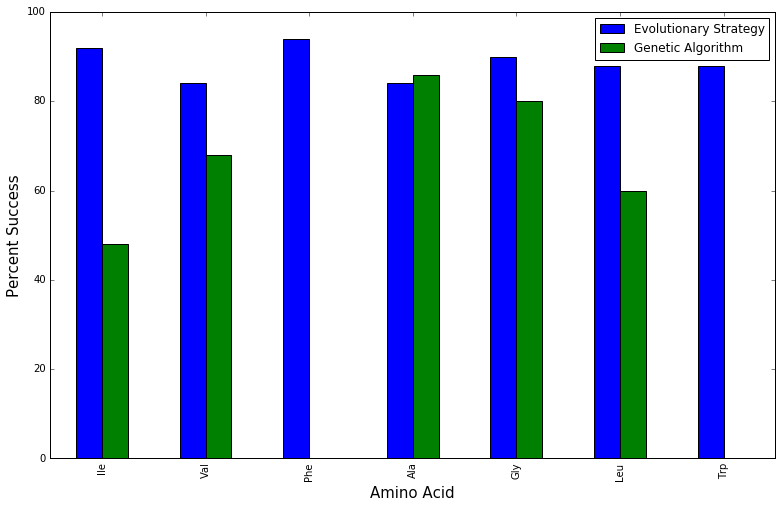

In [9]:


fig = plt.figure(figsize=(13, 8))

ax = fig.add_subplot(111)

stats = pd.concat([b,a], axis=1)

stats.plot.bar(ax=ax)

ax.set_xlabel("Amino Acid", fontdict={"size":15})
ax.set_ylabel("Percent Success", fontdict={"size":15})
fig.savefig("success_rate.pdf")



In [10]:
mass = []
for name in smiles_dict.iterkeys():
    print name
    #print potential_results[potential_results.AA == name].delta_e.mean()
    print "{0} % of the geometries we calculated had a lower energy than the master data for {1}.".format(potential_results[(potential_results.AA == name) & (potential_results.delta_e < 0)].delta_e.count() * 100. / float(potential_results[(potential_results.AA == name)].delta_e.count()), name)
    print "We were able to successfully calculate {} results out of the 50 attempts.".format(potential_results[(potential_results.AA == name) & (potential_results.type == "ga")].delta_e.dropna().shape[0])
    mass.append([potential_results[potential_results.AA == name].MM.iloc[0], potential_results[potential_results.AA == name].delta_e.dropna().shape[0] / 100., potential_results[potential_results.AA == name].delta_e.mean(), potential_results[potential_results.AA == name].delta_e.std(), potential_results])
    #potential_results[(potential_results.AA == name) & (potential_results.type == "ga")].hist(bins = 10)
    
mass = pd.DataFrame(mass)
mass.columns = ["MM", "success", "mean", "std" , "type"]

Ile
0.0 % of the geometries we calculated had a lower energy than the master data for Ile.
We were able to successfully calculate 24 results out of the 50 attempts.
Val
0.0 % of the geometries we calculated had a lower energy than the master data for Val.
We were able to successfully calculate 34 results out of the 50 attempts.
Phe
0.0 % of the geometries we calculated had a lower energy than the master data for Phe.
We were able to successfully calculate 0 results out of the 50 attempts.
Ala
0.0 % of the geometries we calculated had a lower energy than the master data for Ala.
We were able to successfully calculate 43 results out of the 50 attempts.
Gly
0.0 % of the geometries we calculated had a lower energy than the master data for Gly.
We were able to successfully calculate 40 results out of the 50 attempts.
Leu
0.0 % of the geometries we calculated had a lower energy than the master data for Leu.
We were able to successfully calculate 30 results out of the 50 attempts.
Trp
0.0 % o

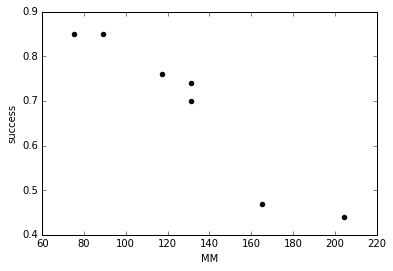

In [11]:
mass.sort_values("MM").plot.scatter( x="MM", y="success", marker="o",c="k")# ax=ax, secondary_y=True)
#mass.sort_values("MM").plot.box()#( x="MM", y="mean")#, yerr="std", marker="o",c="r")# ax=ax )

In [12]:
results = [os.path.join("/gss_gpfs_scratch/harms.n/drug_conformer/",r) for r in os.listdir("/gss_gpfs_scratch/harms.n/drug_conformer/") if ((r.startswith("aa") or r.startswith("gly") or r.startswith("ga"))) and r.endswith(".log") and (not "master" in r)]
results

['/gss_gpfs_scratch/harms.n/drug_conformer/gly_conformer.63.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/aa_conformer.328.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/aa_conformer.292.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/aa_conformer.71.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/gly_conformer.346.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/aa_conformer.long_run.155.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_conformer.162.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/aa_conformer.152.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/gly_conformer.303.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_conformer.234.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/aa_conformer.332.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_conformer.306.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/gly_conformer.183.combined.log',
 '/gss_gpfs_sc

In [13]:
seg_faults = []

for r in results:
    if ((len(r.split("/")[-1].split(".")) == 5) 
        or (r.split("/")[-1].split(".")[0].split("_")[0] == "gly")):
        t = "es"
        
    elif (r.split("/")[-1].split(".")[0].split("_")[0] == "ga"):
        t = "ga"
        
    else:
        continue
        
    #name = r.split('/')[-1].split("_")[0]
        
    
    f = open(r, "r")
    li = f.readlines()[9]
    name = li.split(" ")[-1].split(".")[0]
    
    if (len(r.split("/")[-1].split(".")) == 5) and name == "Gly":
        continue
    elif (r.split("/")[-1].split(".")[0].split("_")[0] == "gly") and name != "Gly":
        continue
    
    f = open(r, "r")
    lines = f.readlines()[-2:]
    
    #print lines
    for l in lines:
        if "RuntimeError" in l:
            seg_fault = True
            complete = True
        elif "Job complete" in l:
            seg_fault = False
            complete = True
        else:
            seg_fault = False
            complete = False
            
    seg_faults.append( [name, t, complete, seg_fault])
seg_faults = pd.DataFrame(seg_faults)
seg_faults.columns = ["name", "type", "complete", "seg_fault"]
seg_faults

,name,type,complete,seg_fault
0,Ile,es,True,False
1,Ile,ga,True,False
2,Phe,ga,False,False
3,Gly,ga,True,True
4,Trp,es,True,False
5,Trp,es,True,False
6,Ala,es,True,False
7,Leu,ga,True,False
8,Val,es,True,False
9,Ile,es,True,False


In [14]:
print "For G.A."
print "{} runs successfully completed.".format(seg_faults[(seg_faults.type == "ga") & (seg_faults.seg_fault == False) & (seg_faults.complete == True) ].count().type)

print "{} runs completed, but resulted in a segfault.".format(seg_faults[(seg_faults.type == "ga") & (seg_faults.seg_fault == True)].count().type)

print "{} runs were unable to complete. These need to be rerun with a longer time cutoff.".format(seg_faults[(seg_faults.type == "ga") & (seg_faults.complete == False)].count().type)

print 

print "For E.S."

print "{} runs successfully completed.".format(seg_faults[(seg_faults.type == "es") & (seg_faults.seg_fault == False) & (seg_faults.complete == True) ].count().type)

print "{} runs completed, but resulted in a segfault.".format(seg_faults[(seg_faults.type == "es") & (seg_faults.seg_fault == True)].count().type)

print "{} runs were unable to complete. These need to be rerun with a longer time cutoff.".format(seg_faults[(seg_faults.type == "es") & (seg_faults.complete == False)].count().type)



For G.A.
171 runs successfully completed.
70 runs completed, but resulted in a segfault.
110 runs were unable to complete. These need to be rerun with a longer time cutoff.

For E.S.
331 runs successfully completed.
9 runs completed, but resulted in a segfault.
11 runs were unable to complete. These need to be rerun with a longer time cutoff.


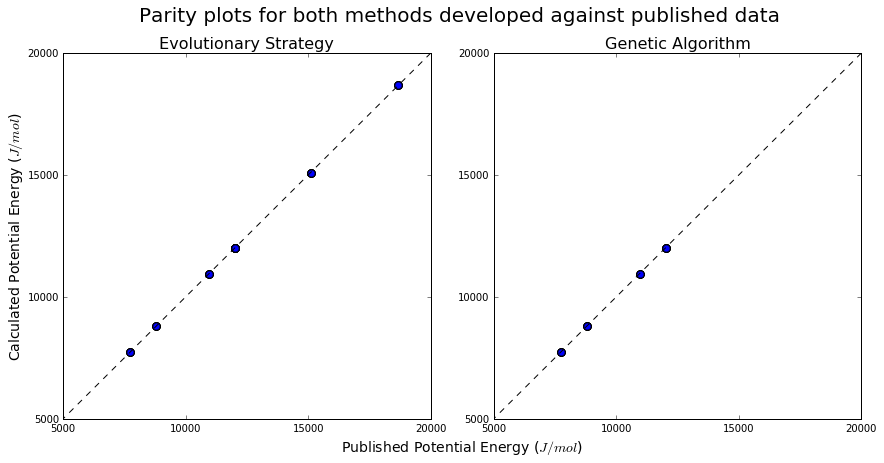

In [15]:

fig = plt.figure(figsize=(13, 7))

ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

ax1.scatter(-1.*potential_results[(potential_results.T != 0.).any() & (potential_results.type == "es")].e_m, 
            -1.*potential_results[(potential_results.T != 0.).any() & (potential_results.type == "es")].e_r, 
            alpha=0.5, 
            s=50,
            
           )
ax2.scatter(-1.*potential_results[(potential_results.T != 0.).any() & (potential_results.type == "ga")].e_m, 
            -1.*potential_results[(potential_results.T != 0.).any() & (potential_results.type == "ga")].e_r, 
            alpha=0.5, 
            s=50,
            
           )

ax.set_xlabel("Published Potential Energy ($J/mol$)", fontdict={"size":14})
ax.set_ylabel("Calculated Potential Energy ($J/mol$)", labelpad=18, fontdict={"size":14})
ax.set_title("Parity plots for both methods developed against published data \n", linespacing=1.5, fontdict={"size":20})
#plt.loglog(True)
ax1.plot([20000, 5000],[20000, 5000], "k--" )
ax1.set_title("Evolutionary Strategy", fontdict={"size":16})

ax1.set_xlim([5000, 20000])
ax1.set_ylim([5000, 20000])
ax1.set_xticks([5000, 10000,15000, 20000])
ax1.set_yticks([5000, 10000,15000, 20000])

ax2.plot([20000, 5000],[20000, 5000], "k--" )
ax2.set_title("Genetic Algorithm", fontdict={"size":16})

ax2.set_xlim([5000, 20000])
ax2.set_ylim([5000, 20000])
ax2.set_xticks([5000, 10000,15000, 20000])
ax2.set_yticks([5000, 10000,15000, 20000])
fig.tight_layout()
fig.savefig("parity_plot.pdf")
#slope, intercept, r_value, p_value, std_err = linregress(potential_results[(potential_results.T != 0.).any()].e_m, potential_results[(potential_results.T != 0).any()].e_r)

Trp, Phe, Leu, Ile, Val, Ala, Gly

In [16]:
potential_results.sort_values("delta_e", ascending=False)

,AA,num,e_r,e_m,MM,type,delta_e
678,Leu,188,-12014.683607,-12017.962973,131.175,es,0.000273
659,Leu,41,-12014.777298,-12017.962973,131.175,ga,0.000265
636,Leu,307,-12014.777298,-12017.962973,131.175,ga,0.000265
616,Leu,97,-12014.777298,-12017.962973,131.175,ga,0.000265
626,Leu,349,-12017.463076,-12017.962973,131.175,es,0.000042
310,Gly,334,-7739.230384,-7739.550159,75.067,es,0.000041
390,Gly,320,-7739.243351,-7739.550159,75.067,es,0.000040
234,Ile,141,-12017.532587,-12017.963988,131.175,es,0.000036
658,Leu,195,-12017.608028,-12017.962973,131.175,es,0.000030
303,Gly,145,-7739.323578,-7739.550159,75.067,es,0.000029
